In [3]:
from scipy import fft, integrate
import numpy as np
import matplotlib.pyplot as plt

In [146]:
x = [np.cos(1.5*i) for i in range(10)]

u = fft.fft(x)

In [147]:
s = fft.dct(x)
s

array([ 2.45772388, -0.4772235 ,  2.94209699, -0.73297997,  7.75429059,
        4.25186291, -3.53498638,  0.29323669, -0.80221847,  0.06511954])

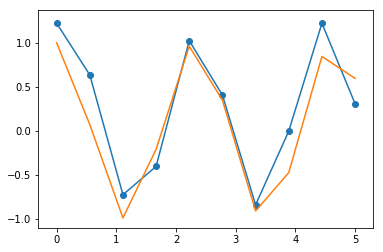

In [148]:
s0 = [sum(s[i]*np.cos(np.pi*(2*i + 1)*t/20)/10 for i in range(len(s))) for t in range(10)]

plt.plot(np.linspace(0, 5, 10), s0)
plt.plot(np.linspace(0, 5, 10), x)
plt.scatter(np.linspace(0, 5, 10), s0)

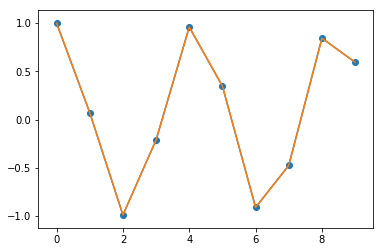

In [149]:
u0 = [sum(u[i]*np.exp(complex(0,1)*np.pi*(4*i)*t/20)/10 for i in range(len(u))) for t in range(10)]

plt.plot(np.linspace(0, 9, 10), u0)
plt.plot(np.linspace(0, 9, 10), x)
plt.scatter(np.linspace(0, 9, 10), u0)

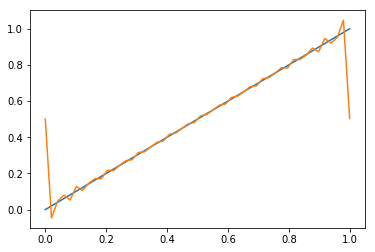

In [76]:
# Fourier series

f = lambda x: x
T = 1

def fourier_coefficient_a(f, T, k):
    return integrate.quad(lambda x: f(x)*np.cos(2*np.pi*k*x/T)/T, -T, T, limit=50)

def fourier_coefficient_b(f, T, k):
    return integrate.quad(lambda x: f(x)*np.sin(2*np.pi*k*x/T)/T, -T, T, limit=50)

def plot_fourier(f, T):
    x = [xi for xi in np.linspace(0, 0.9999, 50)]
    y = [f(xi) for xi in x]
    ya = np.zeros(len(x))
    
    for k in range(20):
        for i in range(len(x)):
            if k == 0:
                ya[i] = ya[i] + 0.5 + fourier_coefficient_a(f, T, k)[0]/2
            else:
                ya[i] = ya[i] + fourier_coefficient_a(f, T, k)[0]*np.cos(2*np.pi*k*x[i]/T) + fourier_coefficient_b(f, T, k)[0]*np.sin(2*np.pi*k*x[i]/T)

    
    plt.plot(x, y)
    plt.plot(x, ya)

plot_fourier(f, T)